In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
REV_DIR = os.getcwd()
RES_DIR = os.path.dirname(REV_DIR)
ROOT_DIR = os.path.dirname(RES_DIR)
sys.path.append(ROOT_DIR)

In [3]:
import mlflow
from revision_utils import TRACKING_URI, BOOSTRAP_RUN_ID
from utils.serialization_ops import load_pickle

mlflow.set_tracking_uri(TRACKING_URI)
path = mlflow.artifacts.download_artifacts(
    "mlflow-artifacts:/6/{run_id}/artifacts/fold_result.pickle".format(run_id=BOOSTRAP_RUN_ID)
)
fold_results = load_pickle(path)

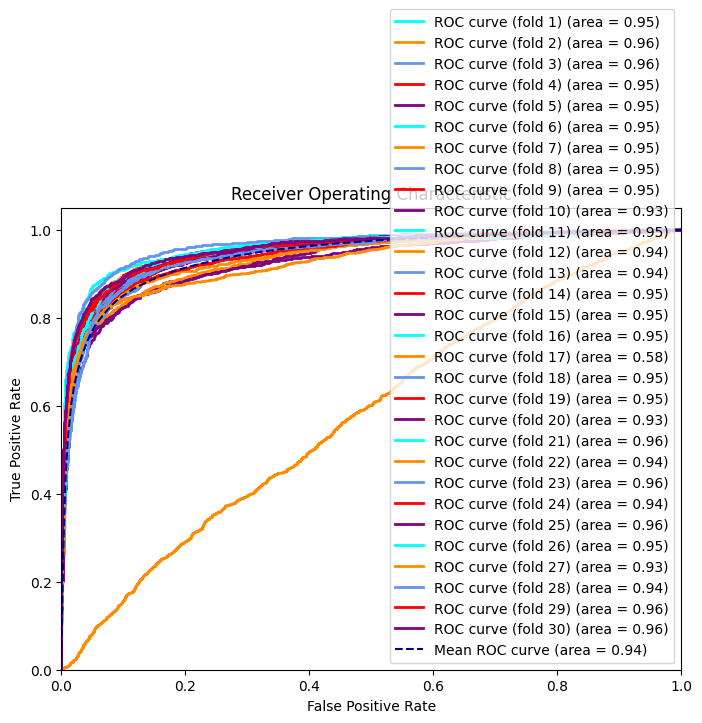

In [8]:
from core.metric import plot_cv_auroc_ci
fold_y_trues = fold_results["fold_bag_y_trues"]
fold_y_probs = fold_results["fold_bag_y_probs"]

plot_cv_auroc_ci(fold_y_trues, fold_y_probs)